# 机器学习基础：鸢尾花分类与葡萄酒聚类

## 实验目的
- 巩固对监督学习核心流程（数据加载、划分、模型训练、预测、评估）的理解。
- 掌握调整K近邻（KNN）算法关键参数（如邻居数K）并观察其对模型性能影响的方法。
- 巩固对无监督学习核心流程（特征选择、数据标准化、参数调优、结果分析）的理解。
- 掌握使用KMeans算法对多维特征数据进行聚类分析，并能解读聚类结果。

## 实验环境
- 软件： Python 3.x, Jupyter Notebook, Scikit-learn, Pandas, Matplotlib
## 实验内容与要求
### 实验内容一：监督学习：鸢尾花分类全流程实践与调优
- 内容描述：
完整地复现并探索鸢尾花（Iris）数据集的分类流程。你将从数据加载开始，亲手完成数据划分、模型训练、预测和评估，并探索调整K近邻（KNN）算法中最重要的参数——邻居数K，将如何影响模型的最终性能。
- 实验要求与代码填空：
请补全下方代码中的 ____ 部分，并回答代码块后面的思考题。

#### --- 1. 导入需要的库和数据 ---

In [12]:
# 导入所有需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris_dataset = load_iris()
print("鸢尾花数据集的键:\n", iris_dataset.keys())

鸢尾花数据集的键:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


####  --- 2. 准备训练数据与测试数据 ---

In [13]:
# 任务：使用 train_test_split 函数将数据划分为训练集和测试集
# 将75%的数据作为训练集，25%作为测试集，设置 random_state=0 以保证结果可复现
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.25
)

In [14]:
# --- 3. 构建模型：K近邻算法 ---
# 任务：创建一个邻居数为 1 的K近邻分类器
knn = KNeighborsClassifier(n_neighbors=1)

# 任务：使用训练数据 X_train 和 y_train 来训练模型
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [15]:
# --- 4. 做出预测 ---
# 任务：使用训练好的模型，对测试集 X_test 进行预测
y_pred = knn.predict(X_test)

In [16]:
# --- 5. 评估模型 ---
# 任务：计算模型在测试集上的准确率
# 方法一：使用 accuracy_score 函数
accuracy = accuracy_score(y_pred, y_test)
print(f"当 k=1 时，测试集准确率: {accuracy:.2f}")
# 方法二：使用模型自带的 .score() 方法
score = knn.score(X_test, y_test)
print(f"当 k=1 时，测试集准确率 (使用.score): {score:.2f}")

当 k=1 时，测试集准确率: 0.97
当 k=1 时，测试集准确率 (使用.score): 0.97


In [17]:
# --- 6. 结果分析与参数调优 ---
print("\n探索不同K值对准确率的影响：")
# 任务：使用for循环测试不同的n_neighbors值 (从1到10)
for k in range(1, 11):
    knn_tuner = KNeighborsClassifier(n_neighbors=k)
    knn_tuner.fit(X_train, y_train)
    # 任务：计算并打印当前k值下的准确率，格式化到小数点后4位
    accuracy_tuner = knn_tuner.score(X_test, y_test)
    print(f"当 n_neighbors = {k} 时, 模型的准确率是: {accuracy_tuner:.4f}")



探索不同K值对准确率的影响：
当 n_neighbors = 1 时, 模型的准确率是: 0.9737
当 n_neighbors = 2 时, 模型的准确率是: 0.9737
当 n_neighbors = 3 时, 模型的准确率是: 0.9737
当 n_neighbors = 4 时, 模型的准确率是: 0.9737
当 n_neighbors = 5 时, 模型的准确率是: 0.9737
当 n_neighbors = 6 时, 模型的准确率是: 0.9737
当 n_neighbors = 7 时, 模型的准确率是: 0.9737
当 n_neighbors = 8 时, 模型的准确率是: 0.9737
当 n_neighbors = 9 时, 模型的准确率是: 0.9737
当 n_neighbors = 10 时, 模型的准确率是: 0.9737


#### 思考题：
- 为什么要将数据集拆分为训练集和测试集？
- 通过上面的参数调优实验，你认为选择哪个K值（n_neighbors）能让模型表现最好？为什么？
- KNN处理分类问题时，是如何根据“邻居”来决定一个新样本的类别的？


#### （2）实验内容二：无监督学习：葡萄酒聚类实践与分析
- 内容描述：
完整地复现并探索葡萄酒（Wine）数据集的聚类流程。完成特征选择、数据标准化、使用肘部法则确定最佳聚类数，并最终运行KMeans算法来分析多维特征数据。
实验要求与代码填空：
请补全下方代码中的 ____ 部分，运行程序并回答后续问题。

In [18]:
# 导入所有需要的库
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# --- 1. 加载并准备数据 ---
wine_df = pd.read_csv('wine_data.csv')
# 选择 'Alcohol'（酒精含量）, 'Color_intensity'（色度）, 'Flavanoids'（黄酮类）三个特征进行聚类
#X = data[['Alcohol', 'Color_intensity', 'Flavanoids']]
X=wine_df[['a', 'b','c']]

In [19]:
# --- 2. 标准化数据 ---
# 任务：创建StandardScaler并对所选的特征数据(X)进行标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

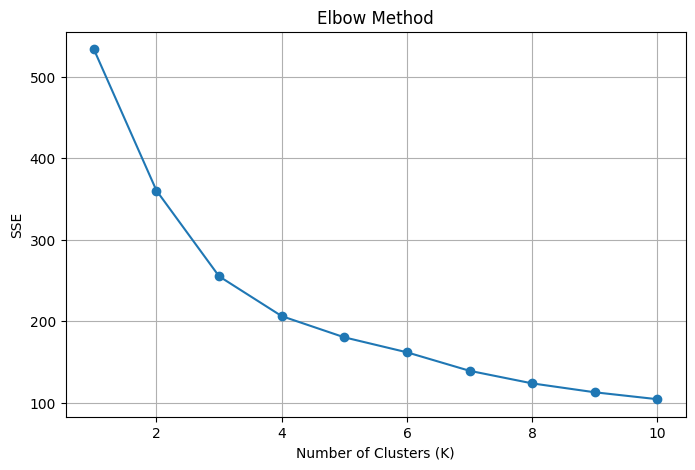

In [20]:
# --- 3. 使用肘部法则确定最佳聚类数 ---
# (此部分代码可直接运行，用于观察)
sse = []
for k in range(1, 11):
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_test.fit(scaled_data)
    sse.append(kmeans_test.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

#### --- 4. 运行KMeans算法并记录时间 ---

In [21]:
# 任务：根据上图的“肘点”，确定最佳的K值
optimal_k =4

# 记录开始时间
start_time = time.time()

# 任务：使用最佳K值创建KMeans模型
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# 任务：使用标准化后的数据(scaled_data)进行聚类，并将结果存入'Cluster'列
wine_df['Cluster'] = kmeans.fit_predict(scaled_data)

# 记录结束时间并计算运行时长
end_time = time.time()
run_time = end_time - start_time

#### --- 5. 分析与输出实验数据 ---
- 讲解：由于我们使用了多个特征，无法直接可视化。因此，我们通过计算每个簇中各个特征的平均值，来理解不同簇的特点。
- 任务：按新生成的聚类标签'Cluster'进行分组，并计算所选特征的均值

In [22]:
features_to_cluster= ['a', 'b','c']
cluster_analysis = wine_df.groupby('Cluster')[features_to_cluster].mean()

print(f"程序运行时间: {run_time:.4f} 秒")
print(f"选择的最佳聚类数 (K): {optimal_k}")
print("\n各簇的特征均值 (聚类中心):\n", cluster_analysis)


程序运行时间: 0.0110 秒
选择的最佳聚类数 (K): 4

各簇的特征均值 (聚类中心):
                  a         b         c
Cluster                               
0        12.489655  1.619655  1.945517
1        13.181591  3.975227  2.429773
2        13.776724  1.831379  2.502414
3        12.188723  1.867447  2.399362


#### 概念回顾与填空：
- 1.数据标准化是聚类分析中的一个重要步骤，我们使用了 ____ 类从 sklearn.preprocessing 库来进行数据的标准化处理，此处理确保了所有特征具有 ____ 的均值和 ____ 的方差。
- 2.KMeans聚类算法通过迭代寻找数据的聚类中心，每次迭代中，算法将每个数据点分配给距离最近的聚类中心，然后重新计算这些聚类的 ____。
- 3.在代码中，我们使用 ____ 方法来确定每个数据点所属的聚类。此外，我们还通过访问模型的 ____ 属性来获取聚类惯性（SSE），这是衡量聚类紧密度的一个指标，其值越 ____ 表示聚类效果越好。


#### 结果分析与思考：
- 1.多次运行你的代码（不修改random_state），实验结果是否完全相同？如果把random_state=42这个参数去掉再多次运行，结果会相同吗？这说明了KMeans算法的什么特点？
- 2.聚类数（K值）对实验结果有什么影响？如果选择的K值过大或过小，会对结果造成什么影响？